# Conservation of modified quantities

In [1]:
# library import
import numpy as jnp
import matplotlib.pyplot as plt
from odes import *

## Problem setup

In [2]:
c = jnp.pi/4 # wave speed
a = 0.1 # rotational speed

# Jet of potential, starting with primitive
cp= 1
#VdJet = [lambda t: cp*(-jnp.exp(-(a-1)**2)), \
#         lambda t: cp*(2*(1-a)*jnp.exp(-(a-1)**2)), \
#         lambda t: cp*((-2 - 4*(-2 + a)*a)*jnp.exp(-(a-1)**2)), \
#         lambda t: cp*((4 + 4*a*(3 + 2*(-3 + a)*a))*jnp.exp(-(a-1)**2)),\
#         lambda t: cp*((20 - 16*a*(2 + (-3 + a)*(-1 + a)*a))*jnp.exp(-(a-1)**2)),\
#         lambda t: cp*(8*(-1 + a)*(-1 + 4*(-3 + a)*(-2 + a)*a*(1 + a))*jnp.exp(-(a-1)**2))]


#VdJet = [lambda t: cp*2/3*t**1.5, \
#         lambda t: cp*jnp.sqrt(t), \
#         lambda t: cp*1/(2*jnp.sqrt(t)), \
#         lambda t: cp*-1/(4*jnp.sqrt(t**3)),\
#         lambda t: cp*3/(8*jnp.sqrt(t**5)),\
#         lambda t: cp*-15/(16*jnp.sqrt(t**7))]

VdJet = [lambda t: cp*t**2, \
         lambda t: cp*2*t, \
         lambda t: cp*2, \
         lambda t: cp*0,\
         lambda t: cp*0,\
         lambda t: cp*0 ]


# discretisation paramter in rational relation dx=m/n*c*dt
m = 2
n = 1
dt = 0.3
ds = c*dt/n
dx = m*ds

(ds,dt,dx,c)

(0.23561944901923448, 0.3, 0.47123889803846897, 0.7853981633974483)

## Compute consistent initial values using a modified ODE
0, 1ds,2ds,...,m*ds,...,(2m-1)*ds

In [3]:
# integrate ode using small Euler steps
NN = 100
hh=ds/NN

zz = jnp.zeros(((2*m-1)*NN+1,4))
zz[0] = [0.1,-0.05,0.,0.1]

for j in range(1,(2*m-1)*NN+1):
    # zz[j] = zz[j-1]+hh*ode0(zz[j-1],VdJet,a,c,dt,dx)
    # zz[j] = zz[j-1]+hh*ode2(zz[j-1],VdJet,a,c,dt,dx)
     zz[j] = zz[j-1]+hh*ode4(zz[j-1],VdJet,a,c,dt,dx)

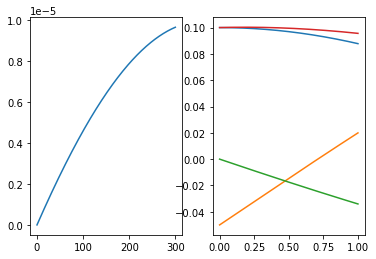

In [4]:
zz2 = jnp.sum(zz[:,:2]**2,1)
dzz2 = jnp.sum(zz[:,2:4]**2,1)
H00 = 1/2*(-a**2*zz2+(c**2-1)*dzz2-VdJet[0](zz2))

fig,axs = plt.subplots(1,2)
axs[0].plot(H00-H00[0])
axs[1].plot(jnp.linspace(0,m-1,(2*m-1)*NN+1),zz)


## Continue solution using functional equation

In [22]:
# initialisation 
K = int(1e3)*2  # number of steps
phi = jnp.zeros((K,2))

# initialise m-1 previous values consistently
for j in range(0,2*m):
    phi[j] = zz[j*NN,:2]

In [23]:
# rotation matrix for rotation speed a
def R(a,t):
    return jnp.array([[jnp.cos(a*t),jnp.sin(a*t)],[-jnp.sin(a*t),jnp.cos(a*t)]])

Rp = R(a,dt)
Rm = R(a,-dt)

# compute values of functional equation
for j in range(m,K-m):
    phi[j+m] = 2*phi[j]-phi[j-m] \
                +(dx**2/dt**2)*(Rm.dot(phi[j+n])-2*phi[j]+Rp.dot(phi[j-n])) \
                -dx**2*VdJet[1](jnp.linalg.norm(phi[j])**2)*phi[j]


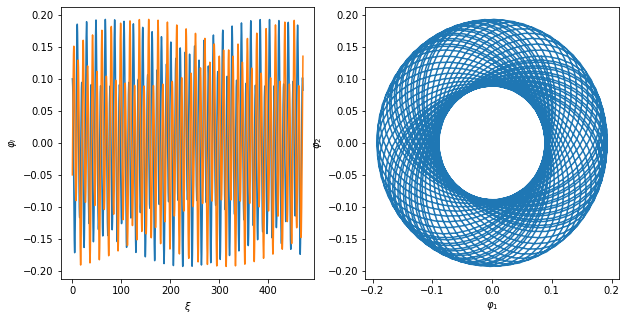

In [24]:
# plot solution

xi0 = jnp.linspace(0,(K-1)*ds,K)
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(xi0,phi)
axs[0].set_xlabel(r'$\xi$')
axs[0].set_ylabel(r'$\varphi_i$')
axs[1].plot(phi[:,0],phi[:,1])
axs[1].set_xlabel(r'$\varphi_1$')
axs[1].set_ylabel(r'$\varphi_2$')
#fig.savefig('dynamics.pdf')

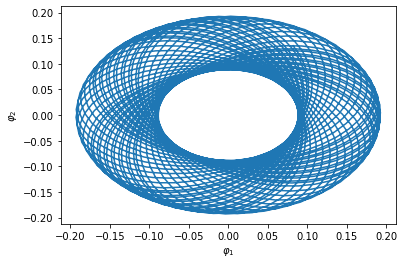

In [28]:
plt.plot(phi[:,0],phi[:,1])
plt.xlabel(r'$\varphi_1$')
plt.ylabel(r'$\varphi_2$')
#plt.savefig('dynamics_phase.pdf')

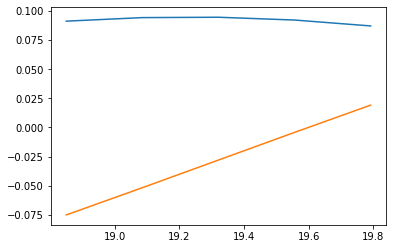

In [19]:
ct = 40
plt.plot(xi0[80:85],phi[80:85])

## Modified Hamiltonian

In [20]:
H0,H2,H4,I0,I2,I4  = Hmod(phi,VdJet,a,c,dt,dx,ds)

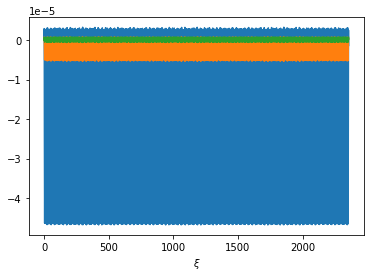

In [21]:
# plot
xi = jnp.linspace(2*ds,(K-3)*ds,K-4)
plt.plot(xi,H0-H0[0],xi,H2-H2[0],xi,H4-H4[0])
plt.xlabel(r'$\xi$')
#plt.savefig('modHam.pdf')

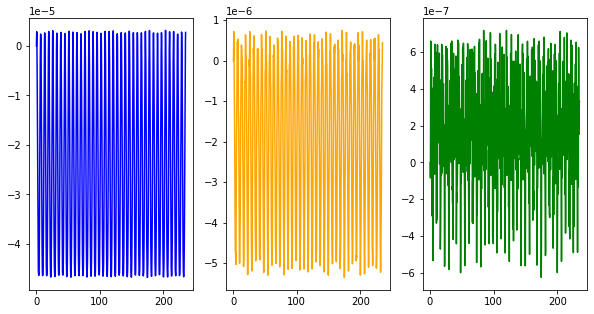

In [11]:
fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].plot(xi,H0-H0[0],'b')
axs[1].plot(xi,H2-H2[0],'orange')
axs[2].plot(xi,H4-H4[0],'g')


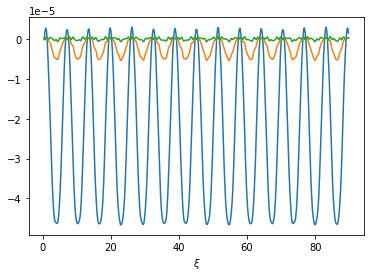

In [12]:
# plot small section
ct = 380
plt.plot(xi[:ct],H0[:ct]-H0[0],xi[:ct],H2[:ct]-H2[0],xi[:ct],H4[:ct]-H4[0])
plt.xlabel(r'$\xi$')
#plt.savefig('modHam_section.pdf')

## Modified generalised angular momentum

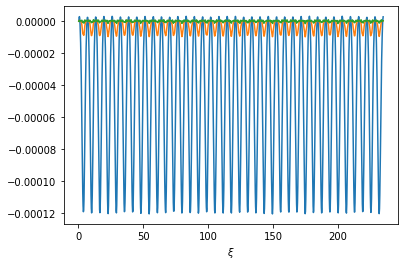

In [13]:
plt.plot(xi,I0-I0[0],xi,I2-I2[0],xi,I4-I4[0])
plt.xlabel(r'$\xi$')
#plt.savefig('modI.pdf')

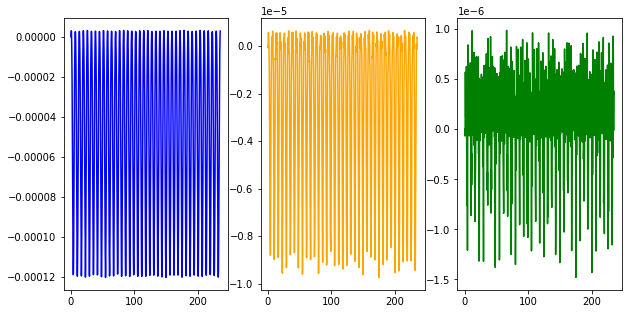

In [14]:
fig,axs = plt.subplots(1,3,figsize=(10,5))
axs[0].plot(xi,I0-I0[0],'b')
axs[1].plot(xi,I2-I2[0],'orange')
axs[2].plot(xi,I4-I4[0],'g')

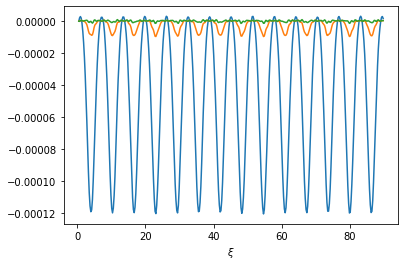

In [15]:
plt.plot(xi[:ct],I0[:ct]-I0[0],xi[:ct],I2[:ct]-I2[0],xi[:ct],I4[:ct]-I4[0])
plt.xlabel(r'$\xi$')
#plt.savefig('modI_section.pdf')